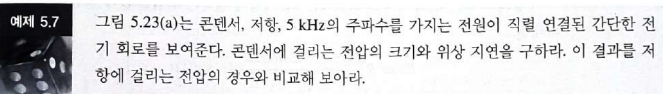

저항에 걸리는 전압 크기: 0.03 V
저항에 걸리는 전압 위상: 88.20 degrees
커패시터에 걸리는 전압 크기: 1.00 V
커패시터에 걸리는 전압 위상: -1.80 degrees


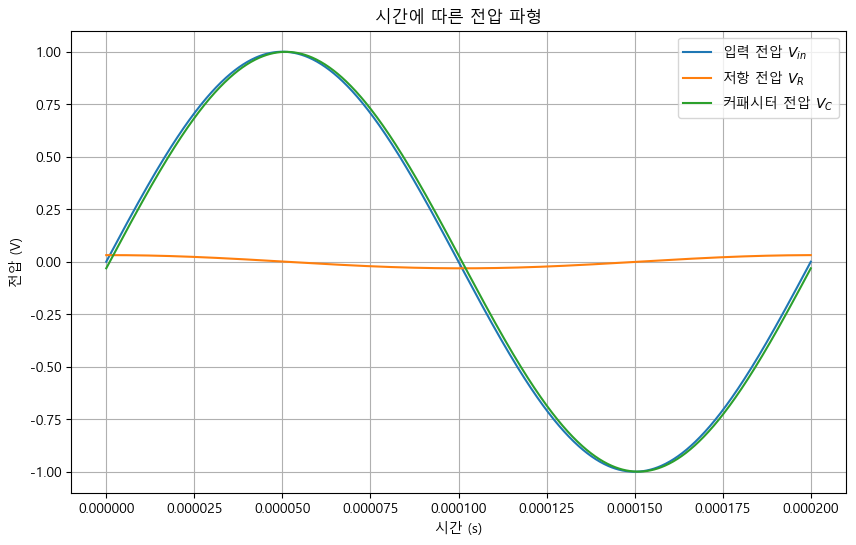

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='Malgun Gothic')


# 주어진 상수
f = 5e3  # 주파수 (Hz)
omega = 2 * np.pi * f  # 각주파수 (rad/s)
V_in = 1  # 입력 전압 (V)
R = 1000  # 저항 (옴)
C = 1e-9  # 커패시터 (F)

# 임피던스 계산
Z_R = R
Z_C = 1 / (1j * omega * C)
Z_total = Z_R + Z_C

# 전압 분배 계산
V_R = V_in * (Z_R / Z_total)
V_C = V_in * (Z_C / Z_total)

# 크기와 위상 계산
V_R_mag = np.abs(V_R)
V_C_mag = np.abs(V_C)
V_R_phase = np.angle(V_R, deg=True)
V_C_phase = np.angle(V_C, deg=True)

print(f"저항에 걸리는 전압 크기: {V_R_mag:.2f} V")
print(f"저항에 걸리는 전압 위상: {V_R_phase:.2f} degrees")
print(f"커패시터에 걸리는 전압 크기: {V_C_mag:.2f} V")
print(f"커패시터에 걸리는 전압 위상: {V_C_phase:.2f} degrees")

# 시각화
t = np.linspace(0, 1/f, 1000)
V_in_t = V_in * np.sin(omega * t)
V_R_t = V_R_mag * np.sin(omega * t + np.deg2rad(V_R_phase))
V_C_t = V_C_mag * np.sin(omega * t + np.deg2rad(V_C_phase))

plt.figure(figsize=(10, 6))
plt.plot(t, V_in_t, label='입력 전압 $V_{in}$')
plt.plot(t, V_R_t, label='저항 전압 $V_R$')
plt.plot(t, V_C_t, label='커패시터 전압 $V_C$')
plt.title('시간에 따른 전압 파형')
plt.xlabel('시간 (s)')
plt.ylabel('전압 (V)')
plt.legend()
plt.grid(True)
plt.show()
